# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) SEC Pandas Lab

Group review of Pandas Day One!

---

In this lab, we will use actual SEC daily trade data from the first week of December 2018.

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#### Using `pd.read_csv`, read in `'sec_dec_2018_w1.csv'` and store it as `sec_df`

In [3]:
sec_df = pd.read_csv('./datasets/sec_dec_2018_w1.csv')

#### Using `DataFrame.head`, look at the first five rows.

In [5]:
sec_df.head(5)

,Unnamed: 0,Date,Security,Ticker,Exchange,McapRank,TurnRank,VolatilityRank,PriceRank,Cancels,...,OrderVol('000),TradeVol('000),LitVol('000),OddLotVol('000),HiddenVol('000),TradeVolForHidden('000),Date_str,Date_str2,Date_time,Weekday
0,0,20181203,Stock,A,Amex,10.0,8.0,1.0,9.0,252.0,...,28.028,5.764,5.664,0.564,0.100,5.764,20181203,20181203,2018-12-03,Monday
1,1,20181203,Stock,A,Arca,10.0,8.0,1.0,9.0,17282.0,...,1806.592,147.957,126.345,23.460,21.612,147.957,20181203,20181203,2018-12-03,Monday
2,2,20181203,Stock,A,Bats-Y,10.0,8.0,1.0,9.0,23948.0,...,2577.323,95.522,89.518,14.341,6.004,95.522,20181203,20181203,2018-12-03,Monday
3,3,20181203,Stock,A,Bats-Z,10.0,8.0,1.0,9.0,86042.0,...,9702.373,347.176,318.967,53.460,28.209,347.176,20181203,20181203,2018-12-03,Monday
4,4,20181203,Stock,A,Boston,10.0,8.0,1.0,9.0,1910.0,...,318.960,70.233,50.389,10.955,19.844,70.233,20181203,20181203,2018-12-03,Monday


#### Using DataFrame.sample, look at five randomly sampled rows.

In [6]:
sec_df.sample(5)

,Unnamed: 0,Date,Security,Ticker,Exchange,McapRank,TurnRank,VolatilityRank,PriceRank,Cancels,...,OrderVol('000),TradeVol('000),LitVol('000),OddLotVol('000),HiddenVol('000),TradeVolForHidden('000),Date_str,Date_str2,Date_time,Weekday
117686,117686,20181204,ETF,KBWY,IEX,3.0,2.0,3.0,2.0,0.0,...,NaN,0.299,NaN,0.000,NaN,NaN,20181204,20181204,2018-12-04,Tuesday
157171,157171,20181206,Stock,PEP,Edge-X,10.0,3.0,1.0,10.0,162237.0,...,16581.461,203.944,179.012,28.137,24.932,203.944,20181206,20181206,2018-12-06,Thursday
163202,163202,20181206,Stock,SPSC,Bats-Z,7.0,8.0,7.0,9.0,5537.0,...,595.798,12.052,6.357,2.947,5.695,12.052,20181206,20181206,2018-12-06,Thursday
136181,136181,20181206,Stock,COG,Bats-Z,9.0,10.0,3.0,6.0,141978.0,...,15981.304,799.338,661.000,68.652,138.338,799.338,20181206,20181206,2018-12-06,Thursday
211114,211114,20181207,Stock,INO,Phlx,5.0,6.0,5.0,3.0,662.0,...,55.992,1.946,1.946,0.346,0.000,1.946,20181207,20181207,2018-12-07,Friday


#### It is difficult to see all of the columns. Using the `columns` attribute, display all of the column names.

In [8]:
sec_df.columns

Index(['Unnamed: 0', 'Date', 'Security', 'Ticker', 'Exchange', 'McapRank',
       'TurnRank', 'VolatilityRank', 'PriceRank', 'Cancels', 'Trades',
       'LitTrades', 'OddLots', 'Hidden', 'TradesForHidden', 'OrderVol('000)',
       'TradeVol('000)', 'LitVol('000)', 'OddLotVol('000)', 'HiddenVol('000)',
       'TradeVolForHidden('000)', 'Date_str', 'Date_str2', 'Date_time',
       'Weekday'],
      dtype='object')

#### We should drop 'Unnamed: 0' from the columns. Run the following code once to drop it. Verify manually the column no longer exists.

In [46]:
sec_df = sec_df.drop(columns=['Unnamed: 0'])

sec_df.columns

Index(['Date', 'Security', 'Ticker', 'Exchange', 'McapRank', 'TurnRank',
       'VolatilityRank', 'PriceRank', 'Cancels', 'Trades', 'LitTrades',
       'OddLots', 'Hidden', 'TradesForHidden', 'OrderVol('000)',
       'TradeVol('000)', 'LitVol('000)', 'OddLotVol('000)', 'HiddenVol('000)',
       'TradeVolForHidden('000)', 'Date_str', 'Date_str2', 'Date_time',
       'Weekday'],
      dtype='object')

#### Many of these column names could be cleaned up! Run the following code once to make the column names more readable. Verify manually they are easier to read.

In [50]:
sec_df = sec_df.rename(columns={
    "OrderVol('000)": "OrderVol",
    "TradeVol('000)": "TradeVol",
    "LitVol('000)": "LitVol",
    "OddLotVol('000)": "OddLotVol",
    "HiddenVol('000)": "HiddenVol",
    "TradeVolForHidden('000)": "TradeVolForHidden"})

sec_df.columns

Index(['Date', 'Security', 'Ticker', 'Exchange', 'McapRank', 'TurnRank',
       'VolatilityRank', 'PriceRank', 'Cancels', 'Trades', 'LitTrades',
       'OddLots', 'Hidden', 'TradesForHidden', 'OrderVol', 'TradeVol',
       'LitVol', 'OddLotVol', 'HiddenVol', 'TradeVolForHidden', 'Date_str',
       'Date_str2', 'Date_time', 'Weekday'],
      dtype='object')

#### Let's use `DataFrame.info` to get an overview of the data. How many rows do we have? How many columns?

In [52]:
sec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254563 entries, 0 to 254562
Data columns (total 24 columns):
Date                 254563 non-null int64
Security             254563 non-null object
Ticker               254563 non-null object
Exchange             254563 non-null object
McapRank             254560 non-null float64
TurnRank             254560 non-null float64
VolatilityRank       254528 non-null float64
PriceRank            254560 non-null float64
Cancels              254563 non-null float64
Trades               249304 non-null float64
LitTrades            232086 non-null float64
OddLots              249304 non-null float64
Hidden               221188 non-null float64
TradesForHidden      221188 non-null float64
OrderVol             237345 non-null float64
TradeVol             249304 non-null float64
LitVol               232086 non-null float64
OddLotVol            249304 non-null float64
HiddenVol            221188 non-null float64
TradeVolForHidden    221188 non-null fl

#### It is difficult to see how many null values we have per column. Try using `DataFrame.isnull().sum()` to display the number of nulls per column.

In [53]:
sec_df.isnull().sum()

Date                     0
Security                 0
Ticker                   0
Exchange                 0
McapRank                 3
TurnRank                 3
VolatilityRank          35
PriceRank                3
Cancels                  0
Trades                5259
LitTrades            22477
OddLots               5259
Hidden               33375
TradesForHidden      33375
OrderVol             17218
TradeVol              5259
LitVol               22477
OddLotVol             5259
HiddenVol            33375
TradeVolForHidden    33375
Date_str                 0
Date_str2                0
Date_time                0
Weekday                  0
dtype: int64

#### Let's make sure the numeric columns make sense. Use `DataFrame.describe` and scan the columns for any strange values. Does this help you make sense of the `Rank` columns?

In [54]:
sec_df.describe()

,Date,McapRank,TurnRank,VolatilityRank,PriceRank,Cancels,Trades,LitTrades,OddLots,Hidden,TradesForHidden,OrderVol,TradeVol,LitVol,OddLotVol,HiddenVol,TradeVolForHidden,Date_str,Date_str2
count,2.545630e+05,254560.000000,254560.000000,254528.000000,254560.000000,2.545630e+05,249304.000000,232086.000000,249304.000000,221188.000000,221188.000000,2.373450e+05,249304.000000,232086.000000,249304.000000,221188.000000,221188.000000,2.545630e+05,2.545630e+05
mean,2.018121e+07,4.779942,4.775047,4.554615,4.670439,1.466110e+04,498.695954,439.098153,158.334567,76.882412,537.143932,6.125240e+03,64.667887,57.317608,5.221436,9.286660,69.208412,2.018121e+07,2.018121e+07
std,1.580150e+00,2.806829,2.790079,2.768868,2.842624,5.588649e+04,2386.031292,2220.094593,760.457385,338.494375,2519.680467,4.142193e+04,428.077728,397.975153,23.539697,52.260954,452.039555,1.580150e+00,1.580150e+00
min,2.018120e+07,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-0.100000,0.000000,2.018120e+07,2.018120e+07
25%,2.018120e+07,2.000000,2.000000,2.000000,2.000000,7.000000e+01,2.000000,1.000000,0.000000,0.000000,2.000000,1.813200e+01,0.102000,0.010000,0.000000,0.000000,0.169000,2.018120e+07,2.018120e+07
50%,2.018121e+07,4.000000,4.000000,4.000000,4.000000,1.009000e+03,30.000000,18.000000,9.000000,6.000000,34.000000,2.102040e+02,2.843000,1.700000,0.280000,0.534500,3.219000,2.018121e+07,2.018121e+07
75%,2.018121e+07,7.000000,7.000000,7.000000,7.000000,7.433000e+03,228.000000,172.000000,76.000000,44.000000,246.000000,1.555780e+03,21.753000,15.935750,2.476000,4.261000,23.102000,2.018121e+07,2.018121e+07
max,2.018121e+07,10.000000,10.000000,10.000000,10.000000,2.976401e+06,275459.000000,260374.000000,68899.000000,40705.000000,275459.000000,4.524973e+06,40774.537000,36210.688000,1913.010000,4563.849000,40774.537000,2.018121e+07,2.018121e+07


#### Let's verify the data is actually from the first week of December 2018! Since it is difficult to read in the summary above, print `Series.min` and `Series.max` to find the smallest and largest dates in the `'Date'` column.

In [83]:
print(sec_df['Date'].min(), sec_df['Date'].max())

20181203 20181207


#### The columns `'Date'`, `'Date_str'`, `'Date_str2'`, and `'Date_time'` have similar names. Try indexing `sec_df` by them to display them side-by-side. Do they seem to have different contents?

In [55]:
sec_df[['Date', 'Date_str', 'Date_str2', 'Date_time']].head(5)

,Date,Date_str,Date_str2,Date_time
0,20181203,20181203,20181203,2018-12-03
1,20181203,20181203,20181203,2018-12-03
2,20181203,20181203,20181203,2018-12-03
3,20181203,20181203,20181203,2018-12-03
4,20181203,20181203,20181203,2018-12-03


#### Let's see how many entries we have per stock exchange. 

1. First, index by `'Exchange'` to get a `Series` of the exchange column.

In [22]:
sec_df['Exchange']

0           Amex
1           Arca
2         Bats-Y
3         Bats-Z
4         Boston
5            CHX
6         Edge-A
7         Edge-X
8            IEX
9            NSX
10          NYSE
11        Nasdaq
12          Phlx
13          Amex
14          Arca
15        Bats-Y
16        Bats-Z
17        Boston
18           CHX
19        Edge-A
20        Edge-X
21           IEX
22           NSX
23          NYSE
24        Nasdaq
25          Phlx
26          Amex
27          Arca
28        Bats-Y
29        Bats-Z
           ...  
254533    Boston
254534    Edge-A
254535    Edge-X
254536       IEX
254537       NSX
254538      NYSE
254539    Nasdaq
254540      Phlx
254541      Arca
254542    Bats-Y
254543    Bats-Z
254544    Boston
254545    Edge-A
254546    Edge-X
254547       IEX
254548       NSX
254549      NYSE
254550    Nasdaq
254551      Phlx
254552      Arca
254553    Bats-Y
254554    Bats-Z
254555    Boston
254556       CHX
254557    Edge-A
254558    Edge-X
254559       NSX
254560      NY

2. Now, add on to the last answer. Use `Series.value_counts()` on the `'Exchange'` column to see how many rows we have per exchange.

In [23]:
sec_df['Exchange'].value_counts()

Nasdaq    22674
Bats-Z    22568
Arca      22559
Edge-X    22294
Edge-A    22159
Bats-Y    22128
Boston    20584
NSX       18834
Phlx      18749
NYSE      17940
IEX       17218
Amex      15958
CHX       10898
Name: Exchange, dtype: int64

3. Again, we'll add on to the last answer. Notice the output of `Series.value_counts` is a `Series`! Use `Series.plot(kind='bar')` to view the value counts as a bar plot.

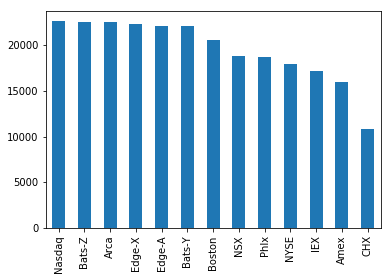

In [25]:
sec_df['Exchange'].value_counts().plot(kind='bar');

#### Using the same procedure, can you show the `value_counts` of each type of security?

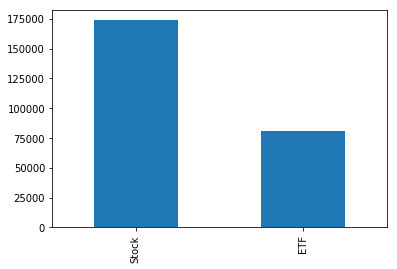

In [62]:
sec_df['Security'].value_counts().plot(kind='bar');

#### Let's understand the `'PriceRank'` column better. Plot a histogram using `Series.hist` to see how the `'PriceRank'` values are distributed. Can you describe what this graph means? What might be good labels for the x and y axes? (Bonus: Do you know why it is distributed how it is?)

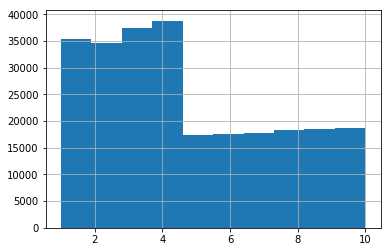

In [73]:
sec_df['PriceRank'].hist();

#### Let's look at Apple (AAPL) stock.

1. First, filter the rows only to those where the column `'Ticker'` is `'AAPL'`. Save this as `aapl_df`.

In [2]:
aapl_df = sec_df[sec_df['Ticker'] == 'AAPL']

aapl_df.head()

NameError: name 'sec_df' is not defined

2. Which exchange had the most trades of AAPL?

In [94]:
aapl_df.sort_values('Trades', ascending=False).head()

,Date,Security,Ticker,Exchange,McapRank,TurnRank,VolatilityRank,PriceRank,Cancels,Trades,...,OrderVol,TradeVol,LitVol,OddLotVol,HiddenVol,TradeVolForHidden,Date_str,Date_str2,Date_time,Weekday
190951,20181207,Stock,AAPL,Nasdaq,10.0,7.0,3.0,10.0,698425.0,93859.0,...,84261.004,9278.288,8303.480,1260.223,974.808,9278.288,20181207,20181207,2018-12-07,Friday
127121,20181206,Stock,AAPL,Nasdaq,10.0,7.0,2.0,10.0,601906.0,88349.0,...,80734.139,8143.161,6945.105,1323.763,1198.056,8143.161,20181206,20181206,2018-12-06,Thursday
63402,20181204,Stock,AAPL,Nasdaq,10.0,7.0,2.0,10.0,605177.0,79993.0,...,84464.045,7432.693,6376.302,1184.123,1056.391,7432.693,20181204,20181204,2018-12-04,Tuesday
131,20181203,Stock,AAPL,Nasdaq,10.0,7.0,2.0,10.0,570428.0,72288.0,...,65686.877,6740.380,5854.174,1016.451,886.206,6740.380,20181203,20181203,2018-12-03,Monday
127111,20181206,Stock,AAPL,Arca,10.0,7.0,2.0,10.0,313051.0,34943.0,...,77767.098,4196.734,3733.449,550.933,463.285,4196.734,20181206,20181206,2018-12-06,Thursday


#### Let's only look at Nasdaq.

1. Filter the rows to only those where the `'Exchange'` column is `'Nasdaq'`. Save this as `nasdaq_df`.

In [96]:
nasdaq_df = sec_df[sec_df['Exchange'] == 'Nasdaq']

nasdaq_df.head()

,Date,Security,Ticker,Exchange,McapRank,TurnRank,VolatilityRank,PriceRank,Cancels,Trades,...,OrderVol,TradeVol,LitVol,OddLotVol,HiddenVol,TradeVolForHidden,Date_str,Date_str2,Date_time,Weekday
11,20181203,Stock,A,Nasdaq,10.0,8.0,1.0,9.0,47834.0,9387.0,...,5486.483,768.270,648.293,141.274,119.977,768.270,20181203,20181203,2018-12-03,Monday
24,20181203,Stock,AA,Nasdaq,9.0,9.0,5.0,7.0,62298.0,3254.0,...,6741.526,293.737,266.018,36.650,27.719,293.737,20181203,20181203,2018-12-03,Monday
37,20181203,Stock,AAC,Nasdaq,2.0,9.0,9.0,2.0,2948.0,293.0,...,736.605,36.508,31.376,1.563,5.132,36.508,20181203,20181203,2018-12-03,Monday
50,20181203,Stock,AAL,Nasdaq,10.0,9.0,5.0,7.0,240539.0,11681.0,...,59414.940,1263.542,1181.346,144.039,82.196,1263.542,20181203,20181203,2018-12-03,Monday
59,20181203,Stock,AAMC,Nasdaq,2.0,2.0,10.0,8.0,1219.0,3.0,...,378.426,0.041,0.004,0.041,0.037,0.041,20181203,20181203,2018-12-03,Monday


2. Which ticker and day had the most trades on Nasdaq in this data?

In [103]:
nasdaq_df.sort_values('Trades', ascending=False).head()

,Date,Security,Ticker,Exchange,McapRank,TurnRank,VolatilityRank,PriceRank,Cancels,Trades,...,OrderVol,TradeVol,LitVol,OddLotVol,HiddenVol,TradeVolForHidden,Date_str,Date_str2,Date_time,Weekday
187325,20181206,ETF,SPY,Nasdaq,4.0,4.0,3.0,4.0,2976401.0,275459.0,...,532032.764,34354.661,31267.221,1913.010,3087.440,34354.661,20181206,20181206,2018-12-06,Thursday
123509,20181204,ETF,SPY,Nasdaq,4.0,4.0,4.0,4.0,2649800.0,259345.0,...,467901.631,34798.613,31361.620,1613.420,3436.993,34798.613,20181204,20181204,2018-12-04,Tuesday
251083,20181207,ETF,SPY,Nasdaq,4.0,4.0,4.0,4.0,2417441.0,236376.0,...,437867.789,28404.372,25495.543,1887.702,2908.829,28404.372,20181207,20181207,2018-12-07,Friday
59858,20181203,ETF,SPY,Nasdaq,4.0,4.0,3.0,4.0,1729621.0,139728.0,...,334045.140,19288.734,17797.630,878.177,1491.104,19288.734,20181203,20181203,2018-12-03,Monday
152958,20181206,Stock,MSFT,Nasdaq,10.0,5.0,3.0,10.0,1214196.0,111235.0,...,155515.238,10835.577,9832.595,1136.355,1002.982,10835.577,20181206,20181206,2018-12-06,Thursday


#### Finally, let's save a report of our AAPL data as an Excel file. This saves it in the current directory. Try opening the report in Excel!

In [106]:
aapl_df.to_excel('aapl_report.xls')

In [1]:
# Displays the Present Working Directory where the report is

%pwd

'C:\\Users\\dan\\TEDS\\203-pandas\\solution-code'